In [1]:
# Gerekli kütüphaneleri ekleme:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Eğitim ve test veri setlerini oluşturma:
X_train = np.array([[6000], [8200], [9000], [14200], [16200]]).reshape(-1, 1) # Araçların kilometre değerleri
y_train = [86000, 82000, 78000, 75000, 70000] # Araçların satış fiyatları

X_test = np.array([[1700], [2600], [11000], [14000], [17500]]).reshape(-1, 1) # Araçların kilometre değerleri
y_test = [94000, 94400, 73000, 83000, 75000] # Araçların satış fiyatları

In [3]:
# Lineer regresyon modelinin eğitimi:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [4]:
# Belirlenmiş olan bir aralık içindeki tüm noktalar için lineer regresyon modelini kullanarak bir tahmin seti elde etme:
xx = np.linspace(0, 25000, 150000)
yy = model.predict(xx.reshape(xx.shape[0], 1))

In [5]:
# Öznitelik değişkeninin derecesini belirleme, ve veri setleri için polinom ve etkileşim özellikleri oluşturma:
from sklearn.preprocessing import PolynomialFeatures
degree_of_polynomial = PolynomialFeatures(degree=2)
X_train_polynomial = degree_of_polynomial.fit_transform(X_train)
X_test_polynomial = degree_of_polynomial.fit_transform(X_test)

In [6]:
# Polinom regresyon modelinin eğitimi:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [7]:
# Belirlenmiş olan bir aralık içindeki tüm noktalar için polinom özellikleri oluşturarak eğitilen polinom regresyon modeli 
# aracılığıyla bir tahmin seti elde etme:
xx_polynomial = degree_of_polynomial.transform(xx.reshape(xx.shape[0], 1))
yy_polynomial = polynomial_model.predict(xx_polynomial)

In [8]:
# Polinom regresyon modelinin kesim parametresini elde etme:
polynomial_model.intercept_

99393.54577620783

In [9]:
# Polinom regresyon modelinin eğim parametrelerini elde etme:
polynomial_model.coef_

array([ 0.00000000e+00, -2.66306426e+00,  5.67196997e-05])

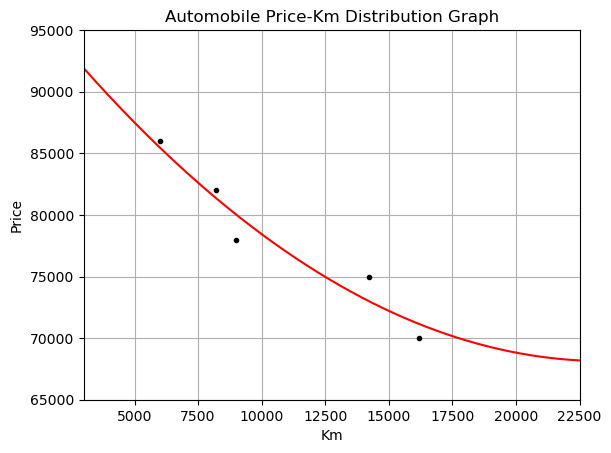

In [10]:
# Eğitim setini görselleştirme ve modelin tahmin eğrisini verilen aralık için oluşturma:
plt.figure()
plt.title("Automobile Price-Km Distribution Graph")
plt.xlabel("Km")
plt.ylabel("Price")
plt.plot(xx, yy_polynomial, c="r", linestyle="-")
plt.plot(X_train, y_train, "k.")
plt.axis([3000, 22500, 65000, 95000])
plt.grid(True)
plt.show()

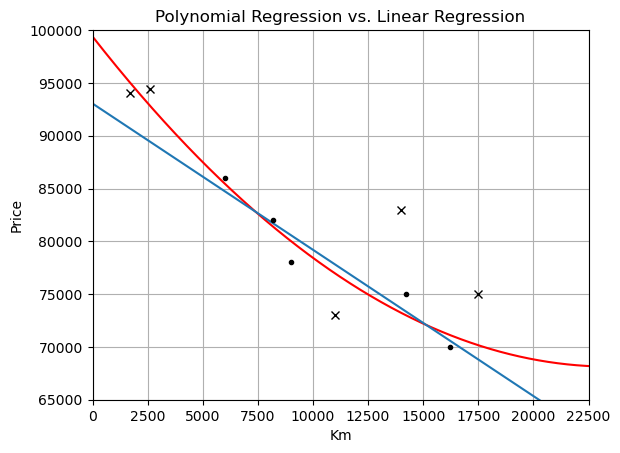

In [11]:
# Eğitim ve test setini birlikte görselleştirme, tahmin eğrisini verilen aralık için hem polinom regresyon hem de lineer 
# regresyon modelleri ile oluşturma:
plt.figure()
plt.title("Polynomial Regression vs. Linear Regression")
plt.xlabel("Km")
plt.ylabel("Price")
plt.plot(xx, yy_polynomial, c="r", linestyle="-")
plt.plot(xx, yy)
plt.plot(X_train, y_train, "k.")
plt.plot(X_test, y_test, "x", color="black")
plt.axis([0, 22500, 65000, 100000])
plt.grid(True)
plt.show()

In [12]:
# Lineer regresyon ve polinom regresyon modellerinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
from sklearn.metrics import r2_score
print("R2 for linear regression model over test set:", r2_score(y_test, model.predict(X_test)))
print("R2 for polynomial regression model over test set:", r2_score(y_test, polynomial_model.predict(X_test_polynomial)))

R2 for linear regression model over test set: 0.5518147334399546
R2 for polynomial regression model over test set: 0.6641120624358704


In [13]:
# Lineer regresyon ve polinom regresyon modellerinin MAE ölçütünü hesaplama (test veri setinin üzerinden tahmin):
from sklearn.metrics import mean_absolute_error
print("MAE for linear regression model over test set:", mean_absolute_error(y_test, model.predict(X_test)))
print("MAE for polynomial regression model over test set:", mean_absolute_error(y_test, polynomial_model.predict(X_test_polynomial)))

MAE for linear regression model over test set: 5721.145833333331
MAE for polynomial regression model over test set: 4230.427748960055


In [14]:
# Lineer regresyon ve polinom regresyon modellerinin MSE ölçütünü hesaplama (test veri setinin üzerinden tahmin):
from sklearn.metrics import mean_squared_error
print("MSE for linear regression model over test set:", mean_squared_error(y_test, model.predict(X_test)))
print("MSE for polynomial regression model over test set:", mean_squared_error(y_test, polynomial_model.predict(X_test_polynomial)))

MSE for linear regression model over test set: 36848716.971927196
MSE for polynomial regression model over test set: 27615900.09547258


In [15]:
# Lineer regresyon ve polinom regresyon modellerinin RMSE ölçütünü hesaplama (test veri setinin üzerinden tahmin):
from math import sqrt
print("RMSE for linear regression model over test set:", sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("RMSE for polynomial regression model over test set:", sqrt(mean_squared_error(y_test, polynomial_model.predict(X_test_polynomial))))

RMSE for linear regression model over test set: 6070.314404701555
RMSE for polynomial regression model over test set: 5255.08326246812


**Yorum**: Basit doğrusal regresyon modeli test setindeki hedef değişkenleri %55 oranında öngörebilirken polinom regresyon modeli %66 oranında öngörebilmektedir. Bu sonucu çizdirmiş olduğumuz grafik üzerinden de doğrulayabiliriz. Görüldüğü gibi polinom regresyon modeli test veri noktalarına daha yakın konumdan geçmektedir. Sonuç olarak, polinom regresyon modeli bilgi kaybına dayalı maliyeti azaltmıştır.